<a href="https://colab.research.google.com/github/KshitijShinde/Colab/blob/main/skill1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<Axes: ylabel='residual sugar'>

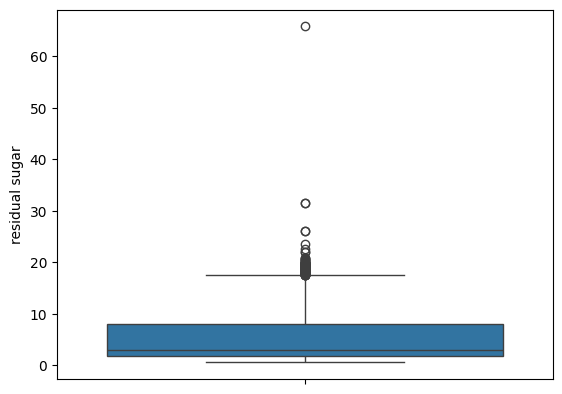

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



from google.colab import drive
drive.mount('/content/drive')

df1=pd.read_csv("/content/drive/MyDrive/dataset/winequality-red.csv",sep=";")
df2=pd.read_csv("/content/drive/MyDrive/dataset/winequality-white.csv",sep=";")

final=pd.concat([df1, df2])
final.head()

final=final.rename(columns={'fixed acidity':'acidity'})
final.head()

final.to_csv('/content/drive/MyDrive/final_wine_data.csv', index=False)

final.head(10)

sns.boxplot(final['residual sugar'])


In [ ]:
import numpy as np
from scipy import stats
z_scores = np.abs(stats.zscore(final.select_dtypes(include=[np.number])))  # Only for numeric columns

# Set a threshold for Z-score
threshold = 3

# Identify outliers: Any value where Z-score > threshold
outliers_zscore = (z_scores > threshold)

# Get the indices of outliers
outlier_indices_zscore = np.where(outliers_zscore)[0]

# Display the rows with outliers
outliers_df = final.iloc[outlier_indices_zscore]
print("Outliers based on Z-score:")
print(outliers_df.head())

Outliers based on Z-score:
    acidity  volatile acidity  citric acid  residual sugar  chlorides  \
1       7.8              0.88         0.00             2.6      0.098   
3      11.2              0.28         0.56             1.9      0.075   
13      7.8              0.61         0.29             1.6      0.114   
14      8.9              0.62         0.18             3.8      0.176   
15      8.9              0.62         0.19             3.9      0.170   

    free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
1                  25.0                  67.0   0.9968  3.20       0.68   
3                  17.0                  60.0   0.9980  3.16       0.58   
13                  9.0                  29.0   0.9974  3.26       1.56   
14                 52.0                 145.0   0.9986  3.16       0.88   
15                 51.0                 148.0   0.9986  3.17       0.93   

    alcohol  quality  
1       9.8        5  
3       9.8        6  
13      9.1   

In [ ]:
import numpy as np
import pandas as pd
from scipy import stats

# Compute Z-scores for numeric columns
z_scores = np.abs(stats.zscore(final.select_dtypes(include=[np.number])))

# Remove rows where any column has Z-score > 3
threshold = 3
final_cleaned = final[(z_scores < threshold).all(axis=1)]

# Print results
print("Original dataset size:", final.shape)
print("Cleaned dataset size:", final_cleaned.shape)
print("Cleaned Data:\n", final_cleaned)


Original dataset size: (6497, 12)
Cleaned dataset size: (5989, 12)
Cleaned Data:
       acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0         7.4              0.70         0.00             1.9      0.076   
2         7.8              0.76         0.04             2.3      0.092   
4         7.4              0.70         0.00             1.9      0.076   
5         7.4              0.66         0.00             1.8      0.075   
6         7.9              0.60         0.06             1.6      0.069   
...       ...               ...          ...             ...        ...   
4893      6.2              0.21         0.29             1.6      0.039   
4894      6.6              0.32         0.36             8.0      0.047   
4895      6.5              0.24         0.19             1.2      0.041   
4896      5.5              0.29         0.30             1.1      0.022   
4897      6.0              0.21         0.38             0.8      0.020   

      free sulfur

Q1 (25th percentile): 1.8
Q3 (75th percentile): 8.1
IQR: 6.3
Lower Bound: -7.6499999999999995
Upper Bound: 17.549999999999997
Number of outliers: 118
Original dataset size: (6497, 12)
Cleaned dataset size: (6379, 12)


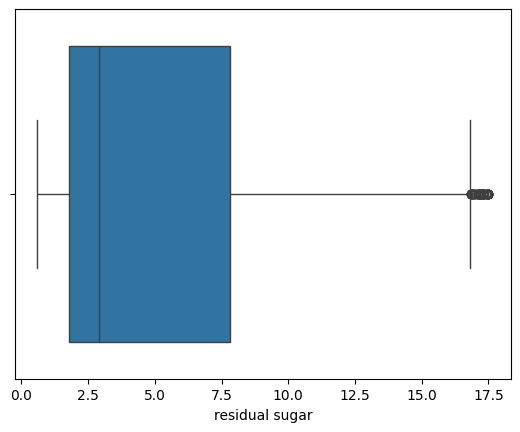

In [ ]:
Q1 = final['residual sugar'].quantile(0.25)
Q3 = final['residual sugar'].quantile(0.75)
IQR = Q3 - Q1

# Compute lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Print values
print(f"Q1 (25th percentile): {Q1}")
print(f"Q3 (75th percentile): {Q3}")
print(f"IQR: {IQR}")
print(f"Lower Bound: {lower_bound}")
print(f"Upper Bound: {upper_bound}")

# Detect outliers
outliers = final[(final['residual sugar'] < lower_bound) | (final['residual sugar'] > upper_bound)]
print(f"Number of outliers: {outliers.shape[0]}")

final_cleaned = final[(final['residual sugar'] >= lower_bound) & (final['residual sugar'] <= upper_bound)]

# Print results
print(f"Original dataset size: {final.shape}")
print(f"Cleaned dataset size: {final_cleaned.shape}")

# Boxplot visualization
sns.boxplot(x=final_cleaned['residual sugar'])
plt.show()

In [ ]:
final.info()


<class 'pandas.core.frame.DataFrame'>
Index: 6497 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   acidity               6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 659.9 KB


In [ ]:
final.describe()

NameError: name 'final' is not defined

In [ ]:
final.isnull().any()

,0
acidity,False
volatile acidity,False
citric acid,False
residual sugar,False
chlorides,False
free sulfur dioxide,False
total sulfur dioxide,False
density,False
pH,False
sulphates,False


In [ ]:
final.isnull().sum()

,0
acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


In [ ]:
final.drop_duplicates(inplace = True)

In [ ]:
final.duplicated()

,0
0,False
1,False
2,False
3,False
5,False
...,...
4893,False
4894,False
4895,False
4896,False


In [ ]:
final.drop_duplicates(inplace=True)

In [ ]:
final.dropna(inplace=True)